1. Training the Model
        splitting of dataset

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE




In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

features = np.random.rand(1000, 20)  # 1000 samples, 20 features each
labels = np.random.randint(2, size=1000)  # 1000 binary labels

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=42)

print(f'Original features shape: {features.shape}')
print(f'Original labels shape: {labels.shape}')
print(f'Training features shape: {X_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Validation features shape: {X_val.shape}')
print(f'Validation labels shape: {y_val.shape}')

print('\nFirst few rows of training features:')
print(X_train[:5])
print('\nFirst few rows of training labels:')
print(y_train[:5])
print('\nFirst few rows of validation features:')
print(X_val[:5])
print('\nFirst few rows of validation labels:')
print(y_val[:5])



Original features shape: (1000, 20)
Original labels shape: (1000,)
Training features shape: (700, 20)
Training labels shape: (700,)
Validation features shape: (300, 20)
Validation labels shape: (300,)

First few rows of training features:
[[0.83280955 0.84741318 0.99870926 0.49443268 0.76776935 0.73210892
  0.23503975 0.61310672 0.46810204 0.69910344 0.75167724 0.04242126
  0.17763277 0.77531086 0.2786609  0.75314536 0.09914728 0.04997588
  0.39561259 0.37119889]
 [0.96214416 0.86294414 0.43789992 0.31204933 0.83257852 0.01001746
  0.77752742 0.18602075 0.17865893 0.74161991 0.63161184 0.05622097
  0.39385665 0.03263334 0.15880505 0.88733408 0.57707622 0.63493141
  0.87765964 0.49756365]
 [0.35462882 0.09527502 0.50183255 0.71248375 0.91659538 0.51423565
  0.1754092  0.55596563 0.03819189 0.05087096 0.76137074 0.91921668
  0.65490915 0.75977656 0.02122342 0.63118556 0.335462   0.5750449
  0.92002523 0.02092509]
 [0.66597364 0.65201593 0.54532278 0.11077018 0.03453852 0.59082254
  0.504

Cross-Validation for Hyperparameter Optimization:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

features = np.random.rand(1000, 20)  # 1000 samples, 20 features each
labels = np.random.randint(2, size=1000)  # 1000 binary labels

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_:.2f}')

best_model = grid_search.best_estimator_

best_model.fit(X_train_resampled, y_train_resampled)

y_pred = best_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Validation Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.53
Validation Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       148
           1       0.52      0.53      0.52       152

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.51      0.51       300



Handling Class Imbalance:
Oversampling (SMOTE):

In [ ]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Original training data shape: {X_train.shape}, {y_train.shape}')
print(f'Resampled training data shape: {X_train_resampled.shape}, {y_train_resampled.shape}')



Original training data shape: (700, 20), (700,)
Resampled training data shape: (700, 20), (700,)


2. Model Evaluation
Metrics to Evaluate:


Accuracy:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
np.random.seed(42)
features = np.random.rand(1000, 20)
labels = np.random.randint(2, size=1000)

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.52



Precision and Recall:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

features = np.random.rand(1000, 20)  # 1000 samples, 20 features each
labels = np.random.randint(2, size=1000)  # 1000 binary labels

labels[:700] = 0
labels[700:] = 1

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.61
Precision: 0.25
Recall: 0.17
F1 Score: 0.20


F1 Score:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

np.random.seed(42)
features = np.random.rand(1000, 20)  # 1000 samples, 20 features each
labels = np.random.randint(2, size=1000)  # 1000 binary labels

labels[:600] = 0
labels[600:] = 1

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)

model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')




Accuracy: 0.54
Precision: 0.40
Recall: 0.37
F1 Score: 0.38


Confusion Matrix:

Accuracy: 0.54
Precision: 0.40
Recall: 0.37
F1 Score: 0.38


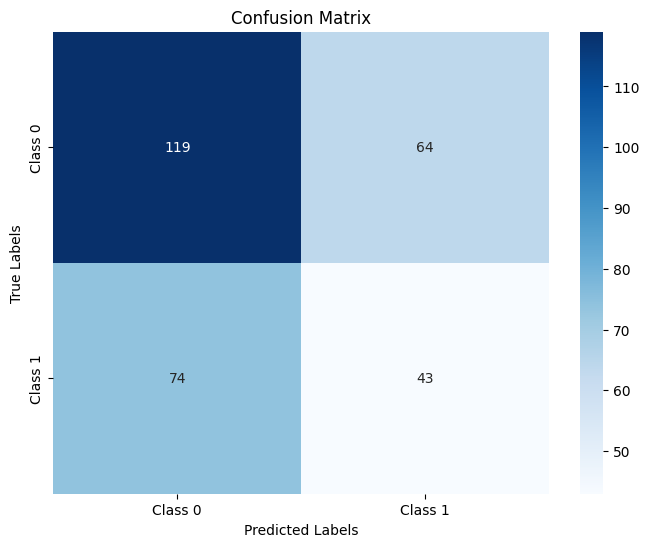

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

np.random.seed(42)
features = np.random.rand(1000, 20)  # 1000 samples, 20 features each
labels = np.random.randint(2, size=1000)  # 1000 binary labels

labels[:600] = 0
labels[600:] = 1

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)

model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


ROC Curve and AUC:

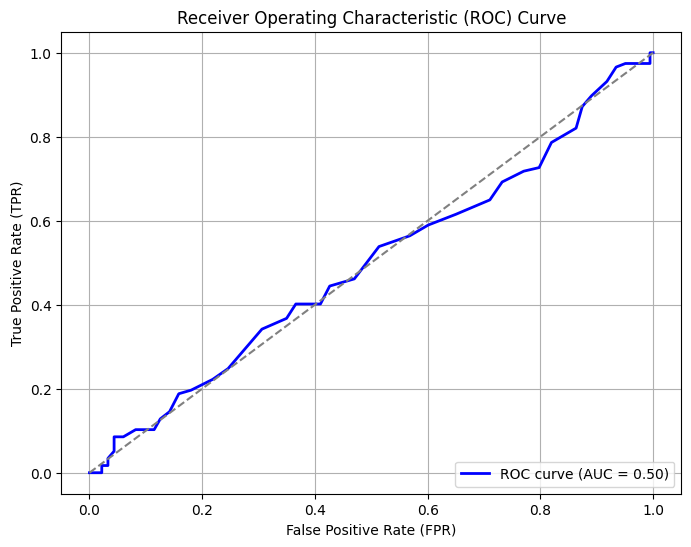

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

np.random.seed(42)
features = np.random.rand(1000, 20)  # 1000 samples, 20 features each
labels = np.random.randint(2, size=1000)  # 1000 binary labels

labels[:600] = 0
labels[600:] = 1

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)

model.fit(X_train_resampled, y_train_resampled)

y_proba = model.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()





Accuracy: 0.85
Precision: 0.88
Recall: 0.83
F1 Score: 0.85
Confusion Matrix:
[[127  18]
 [ 27 128]]


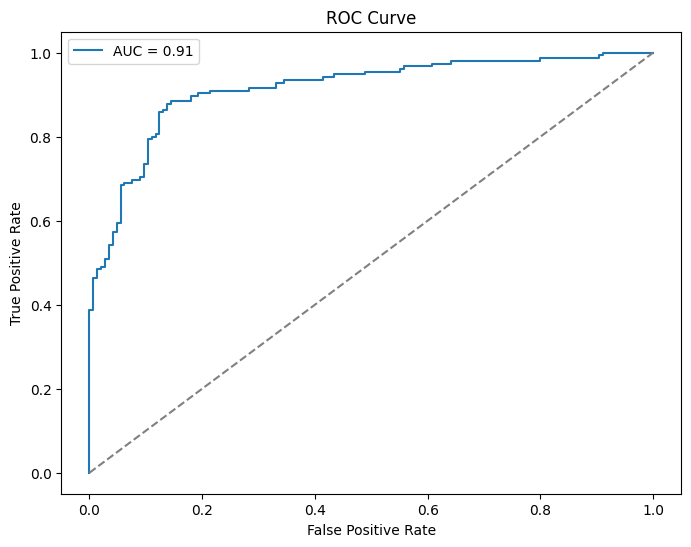

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_prob)

auc = roc_auc_score(y_val, y_prob)

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


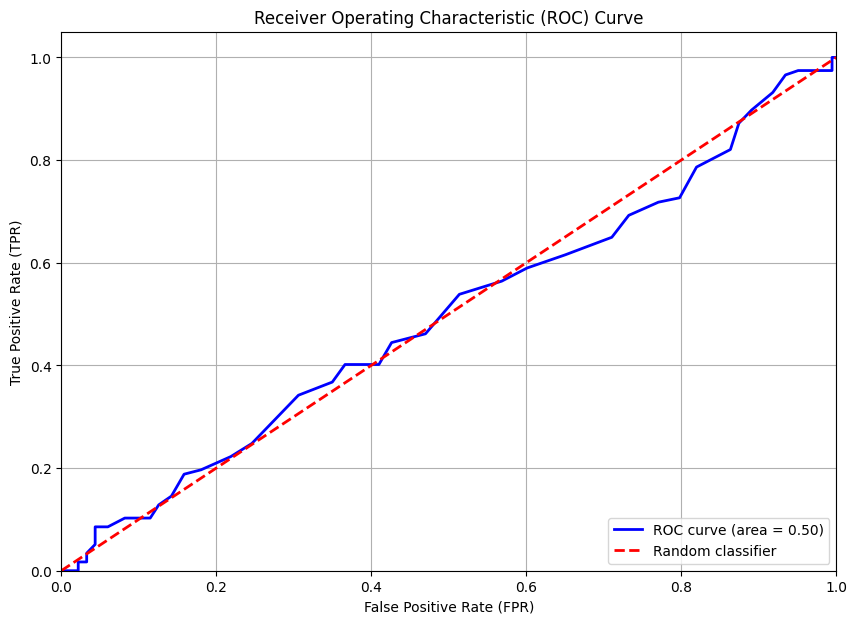

False Positive Rate (FPR): [0.         0.00546448 0.01639344 0.02185792 0.02185792 0.03278689
 0.03278689 0.04371585 0.04371585 0.04371585 0.04371585 0.06010929
 0.08196721 0.1147541  0.12568306 0.1420765  0.15846995 0.18032787
 0.21857923 0.24590164 0.26775956 0.30601093 0.34972678 0.36612022
 0.40983607 0.42622951 0.46994536 0.5136612  0.56830601 0.6010929
 0.65027322 0.71038251 0.73224044 0.7704918  0.79781421 0.81967213
 0.86338798 0.87431694 0.89071038 0.91803279 0.93442623 0.95081967
 0.99453552 0.99453552 0.99453552 1.        ]
True Positive Rate (TPR): [0.         0.         0.         0.         0.01709402 0.01709402
 0.03418803 0.05128205 0.05982906 0.07692308 0.08547009 0.08547009
 0.1025641  0.1025641  0.12820513 0.14529915 0.18803419 0.1965812
 0.22222222 0.24786325 0.28205128 0.34188034 0.36752137 0.4017094
 0.4017094  0.44444444 0.46153846 0.53846154 0.56410256 0.58974359
 0.61538462 0.64957265 0.69230769 0.71794872 0.72649573 0.78632479
 0.82051282 0.87179487 0.8974359 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

np.random.seed(42)
features = np.random.rand(1000, 20)  # 1000 samples, 20 features each
labels = np.random.randint(2, size=1000)  # 1000 binary labels

labels[:600] = 0
labels[600:] = 1

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)

model.fit(X_train_resampled, y_train_resampled)

y_proba = model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print FPR and TPR values for reference
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)

Pie chart


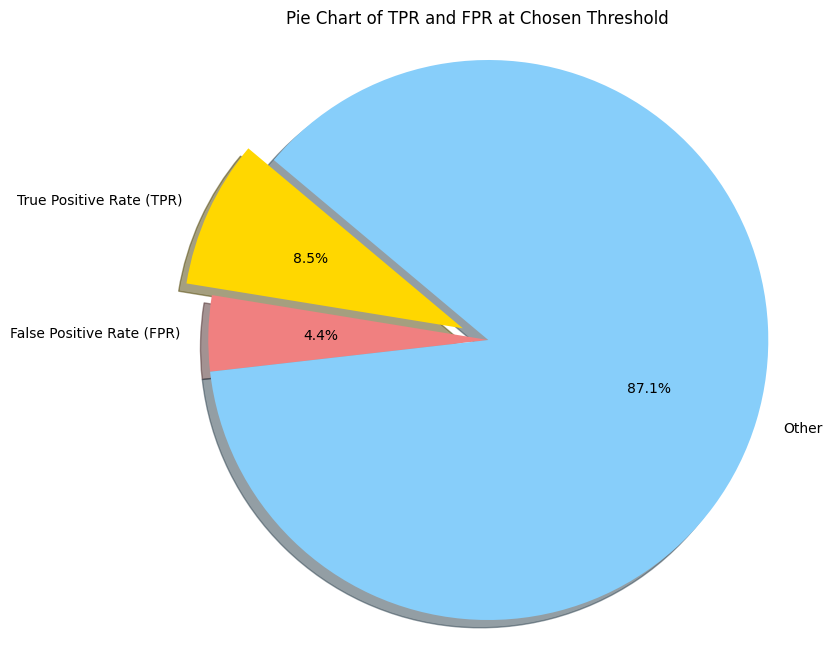

TRP Value at chosen threshold: 0.09
FPR Value at chosen threshold: 0.04
Remaining Value: 0.87


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

np.random.seed(42)
features = np.random.rand(1000, 20)  # 1000 samples, 20 features each
labels = np.random.randint(2, size=1000)  # 1000 binary labels

labels[:600] = 0
labels[600:] = 1

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)

model.fit(X_train_resampled, y_train_resampled)

y_proba = model.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

threshold_index = np.argmax(tpr - fpr)

tpr_value = tpr[threshold_index]
fpr_value = fpr[threshold_index]
remaining_value = 1 - (tpr_value + fpr_value)

labels = ['True Positive Rate (TPR)', 'False Positive Rate (FPR)', 'Other']
sizes = [tpr_value, fpr_value, remaining_value]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie Chart of TPR and FPR at Chosen Threshold')
plt.axis('equal')
plt.show()

print(f'TRP Value at chosen threshold: {tpr_value:.2f}')
print(f'FPR Value at chosen threshold: {fpr_value:.2f}')
print(f'Remaining Value: {remaining_value:.2f}')


### ***~ THE END ~***
